## Chapters 10 & 11
# Filters Preserving Phase and Minimum-Phase Filters

There are no problems provided for these two chapters.

The following listening test comparing minimum-phase and zero-phase lowpass impulse responses is adapted from [page 237](https://ccrma.stanford.edu/~jos/filters/Linear_Phase_Really_Ideal.html).

In [1]:
# Compare minimum-phase and zero-phase lowpass impulse responses.
from scipy.signal import ellip, lfilter
import numpy as np

N = 8     # filter order
Rp = 0.5  # passband ripple (dB)
Rs = 60   # stopband ripple (-dB)
Fs = 8192 # default sampling rate (Windows Matlab)
Fp = 2000 # passband end
Fc = 2200 # stopband begins [gives order 8]
Ns = 4096 # number of samples in impulse responses

B, A = ellip(N, Rp, Rs, Fp / (0.5 * Fs))

# Minimum phase case:
impulse = [1.0] + [0] * (Ns // 2-1)
h1 = lfilter(B, A, impulse) # minimum-phase impulse response
hmp = lfilter(B, A, np.append(h1, [0] * (Ns // 2))) # apply twice

# Zero phase case:
h1r = h1[::-1] # maximum-phase impulse response
hzp = lfilter(B, A, np.append(h1r, [0] * (Ns // 2))) # min*max=zp
# hzp = fliplr(hzp) % not needed here since symmetric

#elliptplots # plot impulse- and amplitude-responses


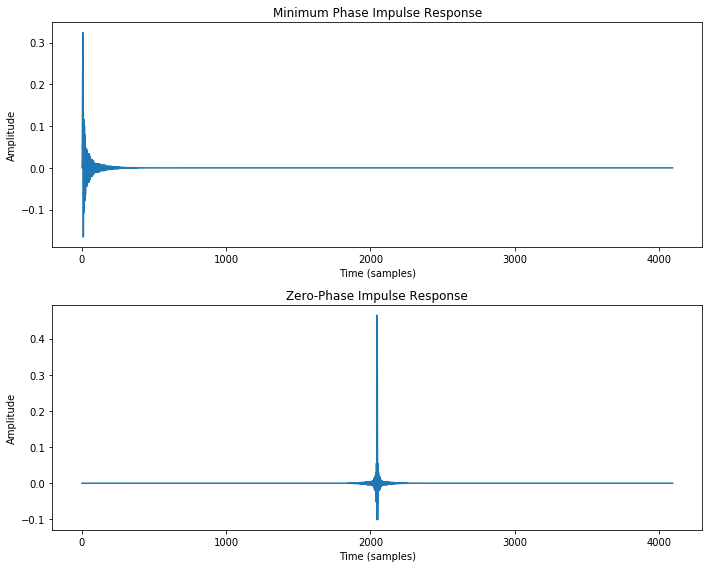

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(hmp)
plt.title('Minimum Phase Impulse Response')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(hzp)
plt.title('Zero-Phase Impulse Response')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()

Verify the magnitude spectra are the same in each case:

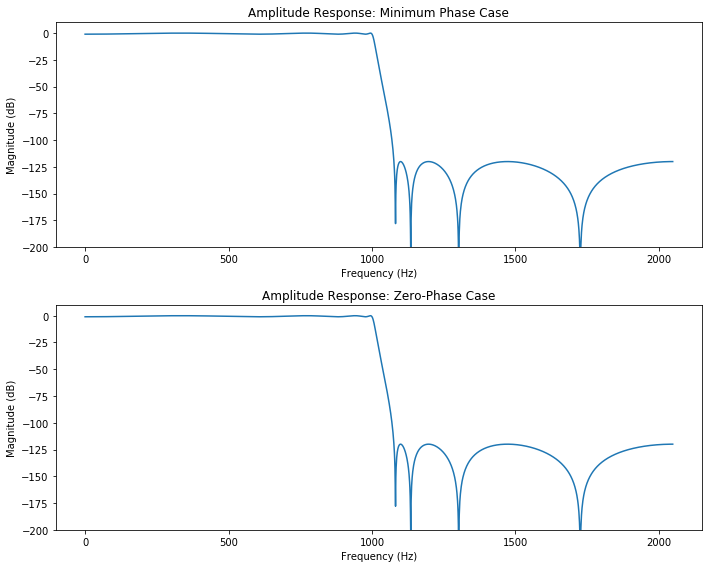

In [3]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(20 * np.log10(np.abs(np.fft.rfft(hmp))))
plt.ylim(-200, 10)
plt.title('Amplitude Response: Minimum Phase Case')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.subplot(212)
plt.plot(20 * np.log10(np.abs(np.fft.rfft(hzp))))
plt.ylim(-200, 10)
plt.title('Amplitude Response: Zero-Phase Case')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.tight_layout()

**Let's hear them!**

Quote from [page 236](https://ccrma.stanford.edu/~jos/filters/Linear_Phase_Really_Ideal.html):

_Since we are listening to a lowpass-filtered impulse, it is reasonable to define the ideal expected sound as a "lowpass-filtered click," or some kind of "compact thump". We may therefore ask which signal sounds more like a lowpassed click, $h_{mp}$ or $ h_{zp}$? In the minimum-phase case, all filter ringing occurs after the main pulse, while in the zero-phase case, it is equally divided before and after the main pulse. Listening tests confirm that the "pre-ring" of the zero-phase case is audible before the main click, giving it a kind of "chirp" quality. Most listeners would say the minimum-phase case is a better "click". Since forward masking is stronger than backward masking in hearing perception, the optimal distribution of ringing is arguably a small amount before the main pulse (however much is inaudible due to backward masking, for example), with the rest occurring after the main pulse._

In [4]:
from IPython.display import Audio

Audio(hmp, rate=Fs)

In [5]:
Audio(hzp, rate=Fs)